<a href="https://colab.research.google.com/github/sajid-ahmed1/CapstoneProject/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formula 1 Race Strategy Optimisation

## Section 1: Project Definition
### Project Overview
The main goal is to assess which lap of the race to pit and the number of pit stops to achieve the highest place finish in the race.
Using Formula 1 data taken from: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020 which gets it's source of data from the Ergast Developer API http://ergast.com/mrd/.

The solution will encompass a Machine Learning solution paired with data exploration and visualisation. There will be elemenets of cleaning and combining data, model tuning and comparisions between my prediction and the actual pit stop strategy taken by the teams in the race. One key note regarding this, during the actual race, some teams tend to base their final decision on what other teams do, thus my prediction against actual may differ due to these conditions.

### Problem Statement
How can we optimise the race strategy to target the highest place finish taking in factors such as tire degredation, position changes and race pace.

### Project Metrics
The metrics will be predominately based off the race data which is a form of time-series data. The statistical metrics to check the model and evaluate which one is better will be mean squared error and R-squared value. As the problem is a regression one, both the MSE and R-Squared are the perfect fit. MSE penalises larger errors when comparing between actual and predicted values whilst r-squared shows the amount of variance in our target variable, both makes sense with a countinous target variable. In the context of Formula 1 data, a large deviation in lap times can result in significant impacts to the race those they should be penalised more which the MSE does. R-Squared value shows how much race pace is explained by our factors chosen and discussed below.

## Section 2: Analysis

### Data Exploration
There are three contributing factors that make this section up:
1. Describing the dataset.
2. Looking at the features, the distribution of the data and it's descriptive statistics.
3. Looking for any abnormalities, biases or anomalies in the dataset.

These will be displayed through data visualisation charts.
The Kaggle dataset contains 14 csv files with different tables. They are:
1. circuits.csv
2. constructor_results.csv
3. constructor_standings.csv
4. constructors.csv
5. driver_standings.csv
6. drivers.csv
7. lap_times.csv
8. pit_stops.csv
9. qualifying.csv
10. races.csv
11. results.csv
12. seasons.csv
13. sprint_results.csv
14. status.csv

Out the 14 datasets, I will need a few of these to make my final table.

lap_times.csv - Essential for analyzing pace and performance throughout the race

pit_stops.csv - Critical for studying pit stop timing and strategies

races.csv - Provides context about each race (date, location, conditions)

circuits.csv - Gives track characteristics which influence strategy

results.csv - Shows final race outcomes to evaluate strategy effectiveness

qualifying.csv - Starting positions affect strategy choices

In [ ]:
# Importing the Formula 1 dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")

# Displaying the path for the file to re-call
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23


In [ ]:
import pandas as pd
import numpy as np
circuits = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23/circuits.csv")
lap_times = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23/lap_times.csv")
pit_stops = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23/pit_stops.csv")
races = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23/races.csv")
results = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23/results.csv")
qualifying = pd.read_csv("/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23/qualifying.csv")

In [ ]:
circuits.head(5)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [ ]:
lap_times.head(5)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
pit_stops.head(5)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [ ]:
races.head(5)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
results.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
qualifying.head(5)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


### Describe the dataset

This Formula 1 dataset contains comprehensive racing information extracted from the Ergast Developer API, encompassing detailed race data across multiple seasons. The dataset is structured across six interconnected tables, each capturing different aspects of Formula 1 races and performance metrics.

#### Size and Coverage
The data is organized into six primary tables: lap_times, pit_stops, qualifying, races, circuits, and results. These tables are linked through common identifiers (raceID, driverID, and circuitID), allowing for comprehensive race analysis. Each table contains thousands of records, with lap_times being the largest due to its lap-by-lap granularity.


#### Table-Specific Descriptions
Lap Times Table

This table forms the backbone of our race analysis, containing detailed timing data for every lap completed by each driver in each race. Each record includes the lap number, position, and precise timing in milliseconds. This granular data allows us to track performance evolution throughout races and identify patterns in driving strategy.


Pit Stops Table

The pit stops data captures every pit stop event, recording the timing, duration, and lap number. This information is crucial for strategy analysis as it shows when teams chose to make their stops and how efficiently they were executed. The timing is recorded in milliseconds, providing high-precision measurement of pit stop performance.


Qualifying Table

Qualifying data includes the results from all qualifying sessions (Q1, Q2, and Q3), showing starting positions and qualifying times. This information provides context for race strategy decisions, as starting position often influences the approach teams take during the race.


Results Table

The results table provides comprehensive race outcomes, including finishing positions, points scored, and fastest lap information. It also tracks the number of laps completed and various timing metrics, offering a complete picture of race performance.


Races and Circuits Tables

These tables provide contextual information about each race event and circuit characteristics. The races table includes dates, rounds, and circuit identification, while the circuits table contains detailed track information including location and circuit-specific attributes.


#### Data Quality Assessment
The dataset shows strong completeness across most recent seasons, though some historical races may have partial missing data, particularly in pit stop timing. Lap time data is consistently recorded, and race results are complete across all seasons. The data maintains internal consistency through proper primary and foreign key relationships between tables.

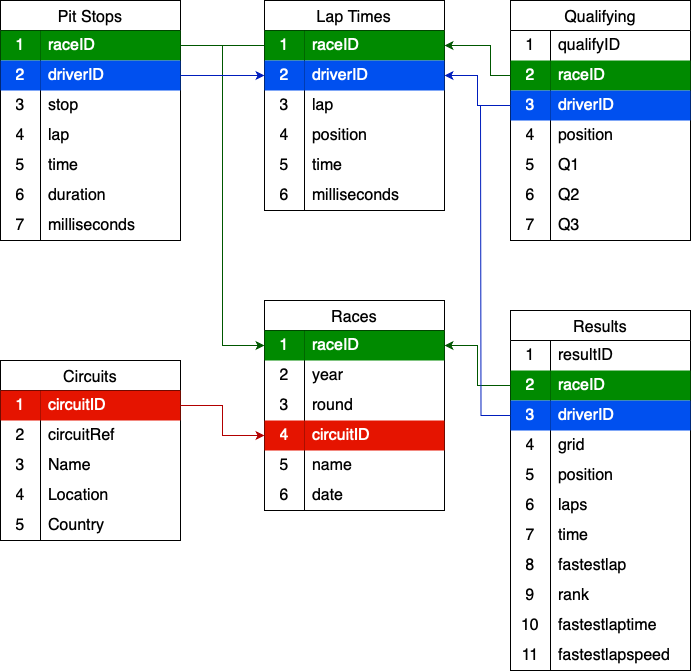

### Features, Distribution and Descriptive Statistics

From the lap times summary statistics, the data ranges from 1996 to 2024. Looking at all the races that have happened in this date range, the mean lap time (minutes) is 1.60 seconds, with the standard deviation of 1.28 seconds. This suggests that there is wide dispersion away from the mean, could be due to the nature of the races. Some street circuits such as Jeddah are very quick and are compenstated with increasing the number of laps done, whilst other are longer by the lap time and have fewer laps overall.

Furthermore, looking at the maximum lap time (minutes) we have one record at 125 minutes long. This is explained below in the code with comments. We also have one record which was the quickest lap set by George Russell, also below.

For the missing values in the position change column in the lap times dataset.These can be explained due to the drivers DNF (Did not finish) and hence their position change was nothing.

From the pit stop summary statistics, duration in seconds is what we are looking at mostly. Across the years 2011 to 2024, the average pit stop duration is 24 seconds with a standard deviation of 4.60 seconds - quite small given that some circuits have short pit durations due to the length of the track and some are quite long. The missing values for duration could be explained as when a driver retires from the race, they forfeit all pit stops.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyse_lap_times(lap_times, races):

  '''

    Helper function to analyse the lap times from two dataframes.

    This helper function combines two dataframes, lap_times and races, on the
    raceId field. It adds some features that will come in handy in the modelling
    steps. We create a groupby raceID to look at the different statistics such
    as mean, std, min and max. lap_time_minutes turns the milliseconds into
    minutes. Position change looks at the position differences per raceId.

    Input:
      lap_times (pandas.DataFrame): One of the input datasets from the Kaggle
        dataset with lap time information.
      races (pandas.DataFrame): One of the input datasets from the Kaggle
        dataset with race information.

    Output:
      lap_stats: statistics table for the lap data
      lap_analysis: the processed data table with the new features added

  '''

  # Merge lap times with races to get year information
  lap_analysis = lap_times.merge(races[['raceId', 'year']], on='raceId')

  # Calculate basic statistics for lap times
  lap_stats = lap_analysis.groupby('raceId')['milliseconds'].agg([
      'mean', 'std', 'min', 'max'
  ]).reset_index()

  # Calculate lap time variations within races
  lap_analysis['lap_time_minutes'] = lap_analysis['milliseconds'] / (1000 * 60)

  # Calculate position changes
  lap_analysis['position_change'] = lap_analysis.groupby('raceId')['position'].diff()

  return lap_stats, lap_analysis

def analyse_pit_stops(pit_stops, races):

  '''

    Helper function to analyse the pit stops from two dataframes.

    This helper function combines two dataframes, pit_stops and races, on the
    raceId field. It adds some features that will come in handy in the modelling
    steps. We convert the miliseconds to numeric type as it was throwing errors
    when computing results and aggregate the data on the mean of duration time
    and the count of laps.

    Input:
      pit_stops (pandas.DataFrame): One of the input datasets from the Kaggle
        dataset with pit stop information.
      races (pandas.DataFrame): One of the input datasets from the Kaggle
        dataset with race information.

    Output:
      pit_stats: statistics table for the pit data
      pit_analysis: the processed data table with the new features added

  '''
  # Merge pit stops with races
  pit_analysis = pit_stops.merge(races[['raceId', 'year']], on='raceId')

  # Convert milliseconds to numeric type, handling any non-numeric values
  pit_analysis['duration'] = pd.to_numeric(pit_analysis['duration'], errors='coerce')
  pit_stats = pit_analysis.groupby('raceId').agg({
      'duration': 'mean',
      'lap': 'count'
  }).reset_index()

  return pit_stats, pit_analysis

def analyse_results(results, races):

    '''

    Helper function to analyse the results from two dataframes.

    This helper function combines two dataframes, results and races, on the
    raceId field. It adds some features that will come in handy in the modelling
    steps. We do some preprocessing on the merged table where we turn grid,
    position, position_change and points into numerical values to stop throwing
    errors and then we calculate basic statistics on aggregated data from points,
    position and laps.

    Input:
      results (pandas.DataFrame): One of the input datasets from the Kaggle
        dataset with result information.
      races (pandas.DataFrame): One of the input datasets from the Kaggle
        dataset with race information.

    Output:
      results_stats: statistics table for the result data
      results_analysis: the processed data table with the new features added

  '''

    # Merge results with races to get year information
    results_analysis = results.merge(races[['raceId', 'year']], on='raceId')

    # Convert grid and position columns to numeric
    results_analysis['grid'] = pd.to_numeric(results_analysis['grid'], errors='coerce')
    results_analysis['position'] = pd.to_numeric(results_analysis['position'], errors='coerce')
    results_analysis['position_change'] = results_analysis['grid'] - results_analysis['position']
    results_analysis['points'] = pd.to_numeric(results_analysis['points'], errors='coerce')

    # Calculate basic statistics
    results_stats = results_analysis.groupby('raceId').agg({
        'points': ['mean', 'sum'],
        'position': ['min', 'max'],
        'laps': ['mean', 'max']
    }).reset_index()

    return results_stats, results_analysis

# Execute the analyses
lap_stats, lap_analysis = analyse_lap_times(lap_times, races)
pit_stats, pit_analysis = analyse_pit_stops(pit_stops, races)
results_stats, results_analysis = analyse_results(results, races)

# Function to print summary statistics
def print_summary_stats(dataframe, title):

    '''

    Helper function to print the summary statistics for multiple tables.

    Input:
      dataframe (pandas.DataFrame): One of the input datasets from the processed
        Kaggle datasets.
      title (string): Title of the dataset.

    Output:
      print functions with describing statistics and showing any null values.

  '''
    print(f"\n{title} Summary Statistics:")
    print(dataframe.describe())
    print("\nMissing Values:")
    print(dataframe.isnull().sum())

# Print summaries for each dataset
print_summary_stats(lap_analysis, "Lap Times")
print_summary_stats(pit_analysis, "Pit Stops")
print_summary_stats(results_analysis, "Race Results")


Lap Times Summary Statistics:
              raceId       driverId            lap       position  \
count  575029.000000  575029.000000  575029.000000  575029.000000   
mean      587.413494     315.316934      30.021122       9.659650   
std       431.352273     384.339100      18.417608       5.531594   
min         1.000000       1.000000       1.000000       1.000000   
25%       137.000000      15.000000      14.000000       5.000000   
50%       855.000000      44.000000      29.000000       9.000000   
75%       993.000000     820.000000      44.000000      14.000000   
max      1131.000000     860.000000      87.000000      24.000000   

       milliseconds           year  lap_time_minutes  position_change  
count  5.750290e+05  575029.000000     575029.000000    574498.000000  
mean   9.580980e+04    2010.769685          1.596830         0.009960  
std    7.692607e+04       8.078218          1.282101         1.146371  
min    5.540400e+04    1996.000000          0.923400       

In [ ]:
lap_analysis.loc[lap_analysis['lap_time_minutes'].idxmax()]
# The longest ever lap time was this race here. raceID: 847 is Canadian Grand Prix on the 12th of June 2011.
# driverID: 2 is Nick Heidfeld driving for Renault F1 Team.
# The safety car was brought out on lap 20 due to the intensity of the rain,[27] and Vettel, Webber, Massa and Buemi, who had not changed tyres, went to the pitlane for fresh full wets.
# [32] After six laps under the safety car, the conditions were getting worse, and the race was suspended.
# Taken from Wikipedia: https://en.wikipedia.org/wiki/2011_Canadian_Grand_Prix

,8372
raceId,847
driverId,2
lap,25
position,4
time,2:05:07.547
milliseconds,7507547
year,2011
lap_time_minutes,125.125783
position_change,0.0


In [ ]:
lap_analysis.loc[lap_analysis['lap_time_minutes'].idxmin()]
# The shortest ever lap time was this race here. raceID: 1046 is Sakhir Grand Prix on the 6th of December 2020.
# driverID: 847 is George Russell driving for Mercedes. In fact, this was when Lewis Hamilton was positive for COVID-19 and his replacement had to drive.
#  On lap 78, Russell's car suffered a rear left tyre puncture, forcing him to pit yet again for a new set of tyres.
# Emerging in 14th position, Russell was able to fight back up to ninth on his new soft tyres in the closing laps to earn his first World Drivers' Championship points, and a point for the fastest lap of the race.
# Russell's fastest lap of 55.404 seconds was the first sub-60 second fastest race lap in the sport's 70-year history, beating the record for shortest fastest race lap duration of 1:00.00 set by Jody Scheckter at the 1974 French Grand Prix
# Taken from Wikipedia: https://en.wikipedia.org/wiki/2020_Sakhir_Grand_Prix

,488409
raceId,1046
driverId,847
lap,80
position,14
time,0:55.404
milliseconds,55404
year,2020
lap_time_minutes,0.9234
position_change,0.0


### Data Visualisation

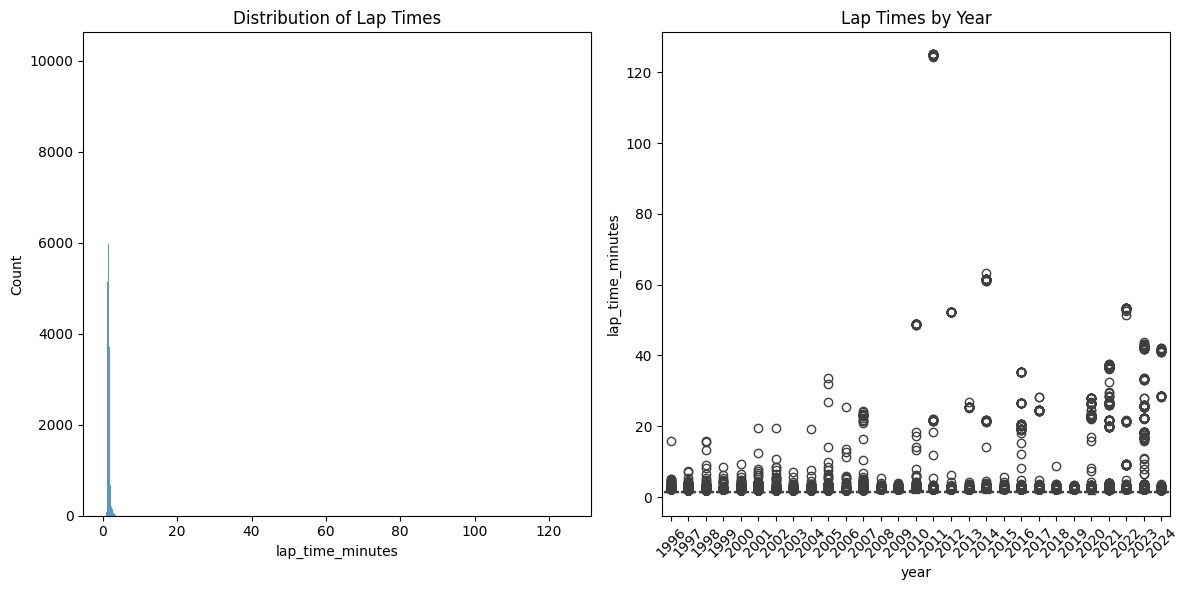

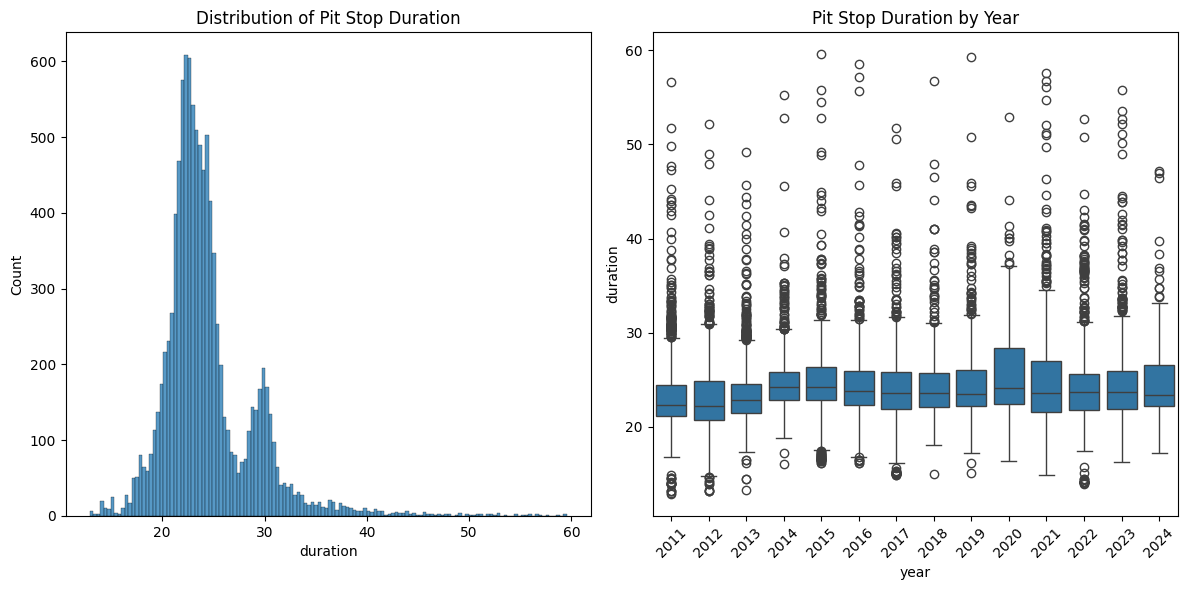

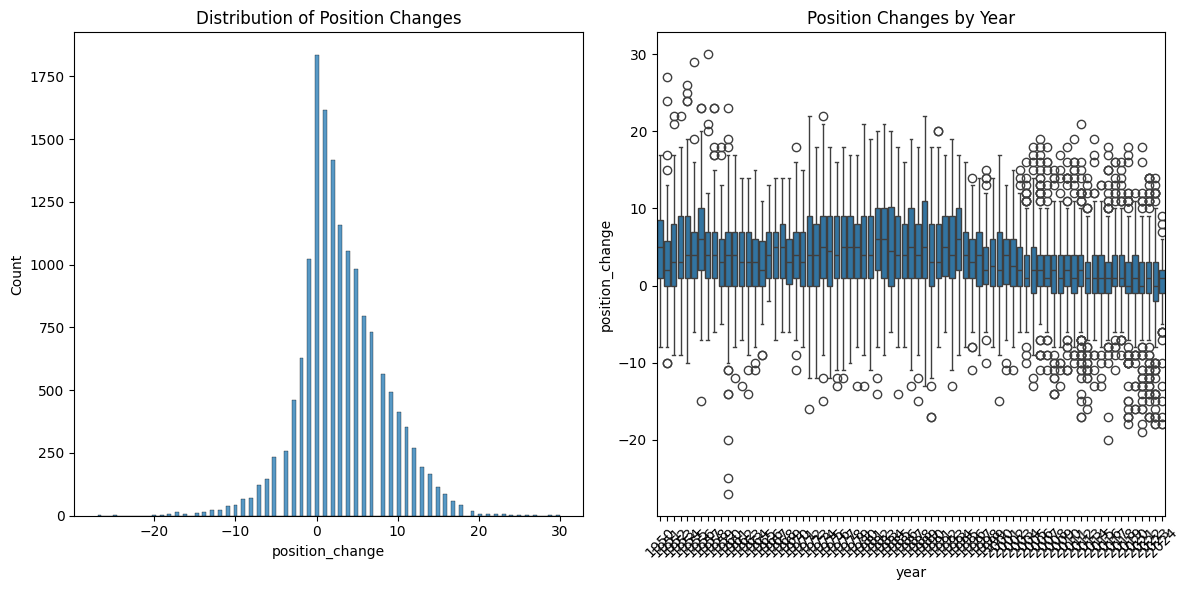

In [ ]:
def create_feature_plots(dataframe, feature, title):

    '''

    Helper function to create feature plots for our datasets with a distribution
    plot and a box plot.

    Input:
      dataframe (pandas.DataFrame): One of the input dataframes that was
        processed earlier.
      feature (pandas.Series): The feature that is displayed from the dataframe.
      title (string): Title of the dataset.

    Output:
      histplot: A histogram of the data and the feature chosen.
      boxplot: A boxplot with outliers displayed from the data and feature per
        year.

  '''

    plt.figure(figsize=(12, 6))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(data=dataframe, x=feature)
    plt.title(f'Distribution of {title}')

    # Box plot by year
    plt.subplot(1, 2, 2)
    sns.boxplot(data=dataframe, x='year', y=feature)
    plt.title(f'{title} by Year')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Create key visualizations
create_feature_plots(lap_analysis, 'lap_time_minutes', 'Lap Times')
create_feature_plots(pit_analysis, 'duration', 'Pit Stop Duration')
create_feature_plots(results_analysis, 'position_change', 'Position Changes')

Looking at the distribution of pit stop duration, we interestingly see two peaks a bi-model distribution. Some clear and cut examples of bi-model distributions are heights as we see two clear peaks, one for man and one for women. In this case, I believe we see two peaks because, the first peak around 21 seconds is the average time it takes for a tire change pit stop to take place whilst the second peak around 30 seconds is those longer pit stops where a front wing is damaged or a steering wheel needs to be changed. Of course, we also take into account the natural swing of the distributions to be rightly skewed as we are talking about a race where every second counts thus the data will be biased to the small range of values.

Looking at the distribution of the position changes from 1950 to 2024, the graph follows almost a bell shaped curve but I would not definetly say it is normal distribution. The data is slightly right skewed meaning we tend to see most drivers lose positions on the grid during a race rather than gain positions. The peak revolves around 0 meaning drivers don't usually change positions from their starting position to final position. The width of the histogram also tells us that although not all drivers experience this, there is significant number of drivers that experience 5-6 moves up or down from their origianl starting position. Moreover, looking at the box plot, we notice the consistency in the inter quartile range which suggests even though the FIA have introduced new regulations to the cars over the years, the net gain or loss is relatively the same across the 74 years of racing. The outliers on the box plot have increased from around the 2000s in both negative and positive directions. This could be a result of FIA changes that affect certain teams with limited resources and their competiveness in the race leading to losing positions due to reliabilty or poor driver performance.


Driver Statistics:

Driver 1:
Average Lap Time: 2.55 minutes
Fastest Lap: 1.43 minutes
Slowest Lap: 35.45 minutes
Lap Time Variation: 4.95 minutes

Driver 3:
Average Lap Time: 2.55 minutes
Fastest Lap: 1.44 minutes
Slowest Lap: 35.41 minutes
Lap Time Variation: 4.95 minutes

Driver 8:
Average Lap Time: 1.88 minutes
Fastest Lap: 1.48 minutes
Slowest Lap: 2.29 minutes
Lap Time Variation: 0.27 minutes

Driver 830:
Average Lap Time: 2.55 minutes
Fastest Lap: 1.42 minutes
Slowest Lap: 35.40 minutes
Lap Time Variation: 4.94 minutes

Driver 20:
Average Lap Time: 2.56 minutes
Fastest Lap: 1.44 minutes
Slowest Lap: 35.30 minutes
Lap Time Variation: 4.92 minutes

Driver 817:
Average Lap Time: 2.56 minutes
Fastest Lap: 1.43 minutes
Slowest Lap: 35.36 minutes
Lap Time Variation: 4.94 minutes

Driver 807:
Average Lap Time: 2.56 minutes
Fastest Lap: 1.45 minutes
Slowest Lap: 35.40 minutes
Lap Time Variation: 4.93 minutes

Driver 815:
Average Lap Time: 2.56 minutes
Fastest Lap: 1.45 minutes
Slowest 

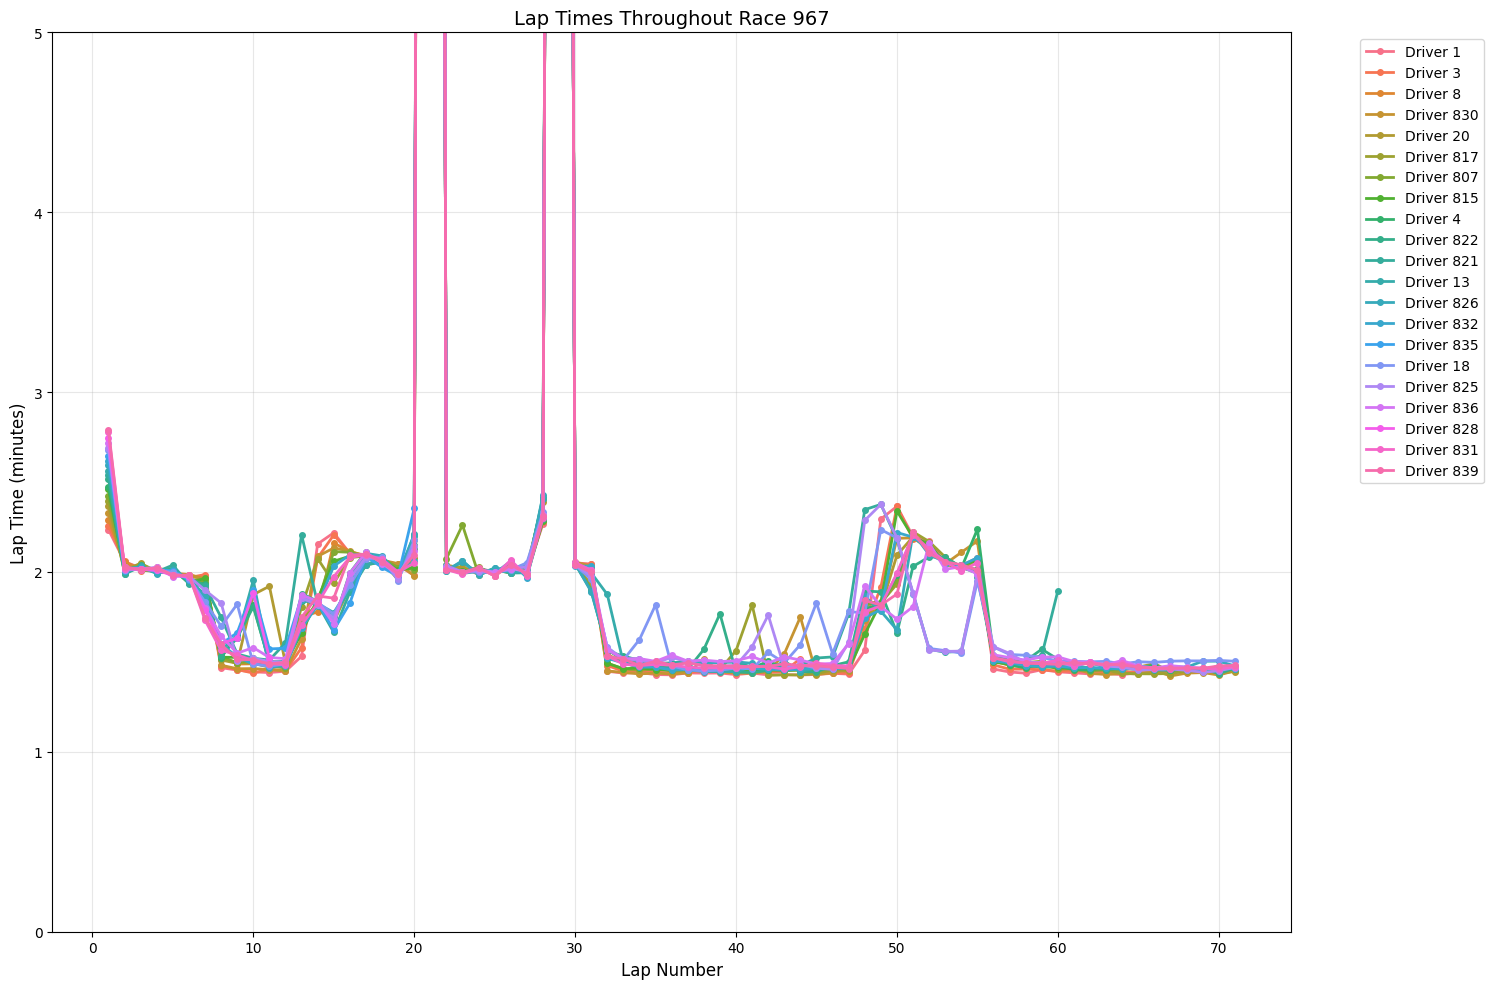

In [ ]:
def analyse_single_race_laps(lap_analysis, race_id):

  '''

    Helper function to analyse a single race from 1950 to 2024.

    This helper function looks at our processed lap data and a specific race
    using raceId and plots a line chart for each driver in that race (assigned
    with different colours). There is also a statistical table that's printed
    for each drivers statistics during the race chosen.

    Input:
      lap_analysis (pandas.DataFrame): One of the processed datasets.
      raceId (integer): The raceId from a race in the lap_analysis dataset.

    Output:
      line chart: A line chart displaying the lap time in minutes against each
        lap for each driver in the race.
      driver statistics: A printed table with driver statistics for the race.

  '''

  # Filter the data for just one race
  single_race = lap_analysis[lap_analysis['raceId'] == race_id].copy()

  # Create a color palette that will give each driver a unique color
  unique_drivers = single_race['driverId'].unique()
  colors = sns.color_palette("husl", n_colors=len(unique_drivers))

  # Create our visualization
  plt.figure(figsize=(15, 10))

  # Plot lap times for each driver separately
  # We'll iterate through drivers and assign each one a different color
  for idx, driver_id in enumerate(unique_drivers):
      driver_data = single_race[single_race['driverId'] == driver_id]
      plt.plot(driver_data['lap'],
              driver_data['lap_time_minutes'],
              marker='o',
              color=colors[idx],
              label=f'Driver {driver_id}',
              linewidth=2,
              markersize=4)

  # Enhance the plot with clear labels and a legend
  plt.title(f'Lap Times Throughout Race {race_id}', fontsize=14)
  plt.xlabel('Lap Number', fontsize=12)
  plt.ylabel('Lap Time (minutes)', fontsize=12)
  plt.ylim(0,5)
  plt.grid(True, alpha=0.3)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  # Adjust layout to make sure the legend fits
  plt.tight_layout()

  # Calculate and print statistics for each driver
  print("\nDriver Statistics:")
  for driver_id in unique_drivers:
      driver_data = single_race[single_race['driverId'] == driver_id]
      print(f"\nDriver {driver_id}:")
      print(f"Average Lap Time: {driver_data['lap_time_minutes'].mean():.2f} minutes")
      print(f"Fastest Lap: {driver_data['lap_time_minutes'].min():.2f} minutes")
      print(f"Slowest Lap: {driver_data['lap_time_minutes'].max():.2f} minutes")
      print(f"Lap Time Variation: {driver_data['lap_time_minutes'].std():.2f} minutes")

  plt.show()

  return single_race

# Looking at a random race: raceID - 967 Brazillian Grand Prix - 13th November 2016
single_race_data = analyse_single_race_laps(lap_analysis, 967)

Looking at the above race, this was the Brazilian Grand Prix in 2016 (circuit: Autódromo José Carlos Pace). https://en.wikipedia.org/wiki/2016_Brazilian_Grand_Prix

The race was extremely wet and the race was under safety car conditions until lap 8, which is where we start to see spikes in lap times. Before then, the times were the same for all drivers. At lap 13, we see another spike in the overall times of the drivers due to a crash bringing out the safety car. The two huge spikes we see are due to the race being called off twice due to two large crashes.

In general, we see three kind of phases in the line chart. The first phase is very homogenous under the safety car. The second phase is huge spikes in lap times due to safety car and weather conditions. The last phase we see stabalised numbers with some psikes around lap 50 (when Felipe Massa crashed)

## Section 3: Methodology

### Data Pre-Processing

In this step, we want to create a few features that can help the machine learning model better predict the lap times and position changes. We want to create a couple features:
1. rolling lap times: this looks at the last five laps of a driver in each race and provides the average across those five laps, like a moving average. This will help with smoothing out the data in terms of the drivers' lap times.
2. personal best: we take the fastest lap time each driver sets in each race.
3. lap time delta: how much quicker or slower the current lap was compared to the last lap. A growing/slower delta would suggest their lap times are not improving and may want to come in for a pit stop for fresh rubber.
4. laps since pit: the number of laps they've done since the driver's last pit stop to understand tire degredation.
5. position delta: the number of positions gained or lost since the last lap. This should capture the number of overtakes or number of cars overtook each driver in each race.
6. race progess: this is a percentage of the number of laps done to the number of laps in total for each race. This will help understand how much of the race we've done. For example, 43/70 laps completed is 61% of the race completed.

Moreover, as discussed previously, we have null/missing values in our dataset due to the nature of some cars not starting or not finishing a race either due to technical faults or accidents. Some races are also called off due to weather risking the drivers' lives. To handle these null values, I filled them in with 0 as there is no gain or loss with a 0 in the missing fields.

Lastly, since these features are all in different scales. It is best practise and something we learnt in the data engineering module to rescale our data as different features have different distributions and scales. If the data is in different scales and distributions, it would cause issues when running the machine learning model. We will be using the StandardScaler() from sklearn module as previously done in the module.

In [ ]:
from sklearn.preprocessing import StandardScaler
def preprocess_circuit_data(lap_times, pit_stops, results):

    '''

    Function to preprocess the three dataframes ready for modelling.

    This function takes in the three dataframes we cleaned up earlier and adds
    in a few features that could be useful for our algorithms. It includes
    rolling_lap_times, personal_best, lap_time_delta etc.

    Input:
      lap_times (pandas.DataFrame): The input dataset containing lap times.
      pit_stops (pandas.DataFrame): The input dataset containing pit stops.
      results (pandas.DataFrame): The input dataset containing results.

    Output:
      processed_data (pandas.DataFrame): The output dataset cleaned.

  '''

    processed_data = lap_times.copy()

    # Calculate rolling averages and personal bests (these parts are good)
    processed_data['rolling_lap_time'] = (
        processed_data.groupby(['circuitId', 'driverId'])['lap_time_minutes']
        .transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    )

    processed_data['personal_best'] = (
        processed_data.groupby(['circuitId', 'driverId'])['lap_time_minutes']
        .transform('min')
    )

    processed_data['lap_time_delta'] = (
        processed_data['lap_time_minutes'] - processed_data['personal_best']
    )

    # First, create a flag for pit stop laps
    pit_lap_data = pit_stops[['circuitId', 'driverId', 'lap']].copy()
    pit_lap_data['is_pit_lap'] = 1

    # Merge pit information using all relevant keys
    processed_data = processed_data.merge(
        pit_lap_data[['circuitId', 'driverId', 'lap', 'is_pit_lap']],
        on=['circuitId', 'driverId', 'lap'],
        how='left'
    )

    # Clean up duplicate circuitId columns
    if 'circuitId_y' in processed_data.columns:
        processed_data = processed_data.drop('circuitId_y', axis=1)
        processed_data = processed_data.rename(columns={'circuitId_x': 'circuitId'})

    # Fill NaN values in is_pit_lap with 0
    processed_data['is_pit_lap'] = processed_data['is_pit_lap'].fillna(0)

    # Calculate laps since pit using groupby and cumulative sum
    processed_data['laps_since_pit'] = (
        processed_data.groupby(['circuitId', 'driverId'])
        .apply(lambda x: (~x['is_pit_lap'].astype(bool)).cumsum())
        .reset_index(level=[0,1], drop=True)
    )

    # Position delta calculation
    processed_data['position_delta'] = (
        processed_data.groupby(['circuitId', 'driverId'])['position']
        .transform(lambda x: x.diff())
    )

    # Race progress calculation
    processed_data['race_progress'] = (
        processed_data.groupby('circuitId')['lap']
        .transform(lambda x: x / x.max())
    )

    # Normalize numerical features
    scaler = StandardScaler()
    numeric_columns = [
        'rolling_lap_time',
        'lap_time_delta',
        'laps_since_pit',
        'race_progress'
    ]
    processed_data[numeric_columns] = scaler.fit_transform(
        processed_data[numeric_columns]
    )

    return processed_data

In [ ]:
'''

Merging the three tables together with circuitId to conduct preprocessing on.
Merging is necessary as circuitId is what we want to use to group the data by,
and predict the next lap times by circuit not by race.

'''

# Add circuitId to your lap times data
lap_analysis = lap_analysis.merge(
    races[['raceId', 'circuitId']],
    on='raceId',
    how='left'
)

# Add circuitId to pit stops data
pit_analysis = pit_analysis.merge(
    races[['raceId', 'circuitId']],
    on='raceId',
    how='left'
)

# Add circuitId to results data
results_analysis = results_analysis.merge(
    races[['raceId', 'circuitId']],
    on='raceId',
    how='left'
)

processed_data = preprocess_circuit_data(lap_analysis, pit_analysis, results_analysis)
processed_data_2 = preprocess_circuit_data(lap_analysis, pit_analysis, results_analysis) # For model 2
processed_data

<ipython-input-53-17da4f3fb4e0>:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (~x['is_pit_lap'].astype(bool)).cumsum())
<ipython-input-53-17da4f3fb4e0>:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (~x['is_pit_lap'].astype(bool)).cumsum())


,raceId,driverId,lap,position,time,milliseconds,year,lap_time_minutes,position_change,circuitId,rolling_lap_time,personal_best,lap_time_delta,is_pit_lap,laps_since_pit,position_delta,race_progress
0,841,20,1,1,1:38.109,98109,2011,1.635150,NaN,1,0.053675,1.419817,0.023557,0.0,-1.051815,NaN,-1.603708
1,841,20,2,1,1:33.006,93006,2011,1.550100,0.0,1,-0.012013,1.419817,-0.043236,0.0,-1.045892,0.0,-1.541764
2,841,20,3,1,1:32.713,92713,2011,1.545217,0.0,1,-0.036424,1.419817,-0.047071,0.0,-1.039969,0.0,-1.479820
3,841,20,4,1,1:32.803,92803,2011,1.546717,0.0,1,-0.048050,1.419817,-0.045893,0.0,-1.034046,0.0,-1.417875
4,841,20,5,1,1:32.342,92342,2011,1.539033,0.0,1,-0.057400,1.419817,-0.051927,0.0,-1.028123,0.0,-1.355931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585754,1131,858,65,19,1:10.742,70742,2024,1.179033,-1.0,70,-0.539152,1.160183,-0.130749,0.0,-0.329186,-1.0,1.623495
585755,1131,858,66,19,1:10.855,70855,2024,1.180917,0.0,70,-0.539940,1.160183,-0.129270,0.0,-0.323263,0.0,1.674097
585756,1131,858,67,19,1:12.454,72454,2024,1.207567,0.0,70,-0.549960,1.160183,-0.108341,0.0,-0.317340,0.0,1.724700
585757,1131,858,68,19,1:13.607,73607,2024,1.226783,0.0,70,-0.541423,1.160183,-0.093249,0.0,-0.311417,0.0,1.775302


### Implementation

Firstly, I will be using the RandomForest algorithm as I think it suits my data better. The Random Forest algorithm is a supervised learning model that can pick up on non-linear relationships (great for Formula 1 data as there are a lot of relationships and factors outside of data, almost like latent features in recommendation systems). It is great at handling multiple input variables and can handle complex interactions well.

The response variables (X) for this model are:
1. rolling lap time
2. lap time delta
3. laps since pit
4. race progress
5. position delta

as mentioned previously. Our target variable is the next lap time (to predict the next lap time done).

The Random Forest model takes in a few parameters:

```
model = RandomForestRegressor(
        n_estimators=50,      # Reduced from 100 for faster training
        max_depth=8,          # Slightly reduced depth
        min_samples_split=10, # Increased to reduce tree complexity
        n_jobs=-1,           # Use all CPU cores
        random_state=42      # Random state to allow replicable outputs
    )
```
I had to change these parameters to allow quicker run times and also include n_jobs to use all available CPU cores to process the data. Assigned a random state of 42 for others to be able to replicate the same random numbers as me. n_estimators is the number of bootstrapped datasets and thus decision trees created. max_depth is the number of splits you can have from the root to any leaf node, meaning the depth of the tree - in our example below, the decision tree has 3 depth.
min_samples_split is the number of minimum samples needed in a node before it can be split, meaning if the node has less than 10 samples (ids from our example) it becomes a leaf node.


To explain the algorithm, the random forest algorithm comes from a series of decision trees (hence the forest part of the name). The problem with decision trees in its raw form is that the decision nodes are too sensitive to the trainning data which could result to high variance and would fail when testing or real world application.

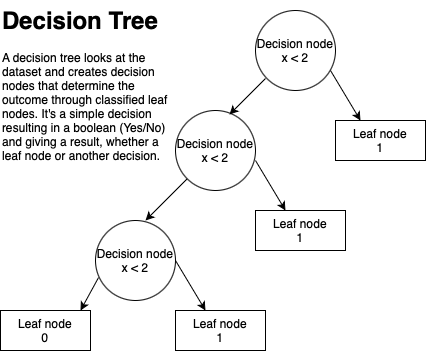

The random aspect comes from building new datasets from our data. Each dataset would contain the same number of rows as our original one. We perform random sampling **with replacement** meaning the same row could come up more than once. This process is called **bootstrapping data**. With these bootstrapped datasets, we will also take a random number of features (columns) for each tree and use them for trainning the model. Then we create the decision trees on these boostrapped data with their random features.


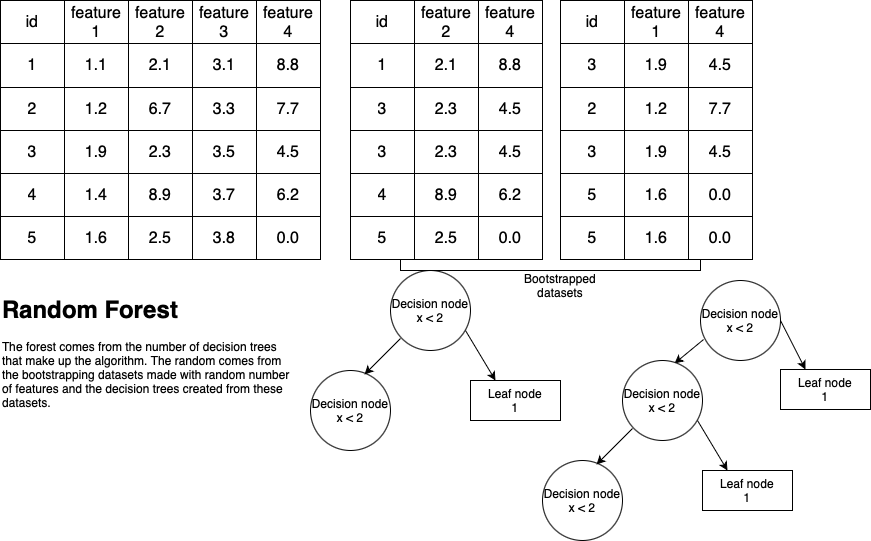

*How do we take a prediction of a new data point with the random forest model?*

Let's say our new data point is the following:
id = 6
feature 1 = 1.1
feature 2 = 2.2
feature 3 = 3.3
feature 4 = 4.4

We run these values through our decision trees and calculate the predictions.
Decision tree 1: 1
Decision tree 2: 0
Decision tree 3: 1

Our final overall prediction will be the majority of votes which is 1. The process of combing multiple results from multiple models is called **aggregation**. The two processes (bootstrapping and aggregation) is called **bagging**.

*Why do we care about doing bootstrapping and feature selection?*

Boostrapping allows randomness with the same dataset esnuring we are not overfitting to the trainning data and we are not sensitive to it. The random feature selection reduces the correlation with the other trees, random features, random trees, random nodes - reduces the variance. Some trees will give bad predicitions as they will be using less important features, some will give good predictions as they will use more important features. For example, in our model position_delta is a less important feature so those decision trees with that feature will give slightly worse predictions. The trees with race_progess will give the better predictions.

*What is the ideal number of features in our random feature selection?*

Researchers say the ideal number is the log or square root of the total number of features.

*How do you use this in a regression problem?*

A regression problem is when you are trying to predict a continous numerical value like predicting the house price based on it's features (size, balcony etc).

A classification problem is when you are trying to predict categories like if an email is spam or not.

With a regression problem and using Random Forest, instead of taking the most votes from the decision tree, you take the average across all the decision trees and that is our final prediction for the new data.

This Youtube video clearly explains the workings of the random forest model: https://www.youtube.com/watch?v=v6VJ2RO66Ag&t=303s


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def prepare_model_data(processed_data):
    """
    Prepares data for modeling by creating features and target variables based on circuit performance.
    This function transforms raw lap data into a format suitable for predicting future lap times.

    Input:
      processed_data (pandas.DataFrame): The input dataset from preprocessing.

    Output:
      X (pandas.DataFrame): Features used for predicting lap times.
      y (pandas.Series): Target variable: the next lap's time.

    """
    # Select features that influence lap time performance on a specific circuit
    feature_columns = [
        'rolling_lap_time',
        'lap_time_delta',
        'laps_since_pit',
        'race_progress',
        'position_delta'
    ]

    # Create our target variable: the next lap's time
    processed_data['next_lap_time'] = processed_data.groupby(
        ['circuitId', 'driverId'])['lap_time_minutes'].shift(-1)

    # Remove rows without next lap times and prepare feature matrices
    model_data = processed_data.dropna(subset=['next_lap_time'])
    X = model_data[feature_columns]
    y = model_data['next_lap_time']

    return X, y

def train_strategy_model(processed_data):

    """

    An optimised version of the strategy model training that reduces computation time
    while maintaining prediction quality.

    Input:
      processed_data (pandas.DataFrame): The input dataset from preprocessing.

    Output:
      model (sklearn.ensemble.RandomForestRegressor): The trained regression model.

    Example:
      features = ['rolling_lap_time', 'lap_time_delta', 'position_delta']
      model, mse, r2, feature_importance = train_strategy_model(processed_data)

    """

    # Prepare our data more efficiently
    feature_columns = [
        'rolling_lap_time',
        'lap_time_delta',
        'laps_since_pit',
        'race_progress',
        'position_delta'
    ]

    # Create next lap time target more efficiently using shift
    processed_data['next_lap_time'] = processed_data.groupby(['circuitId', 'driverId'])['lap_time_minutes'].shift(-1)

    # Remove unnecessary columns early to reduce memory usage
    model_data = processed_data[feature_columns + ['next_lap_time', 'circuitId']].copy()
    model_data = model_data.dropna(subset=['next_lap_time'])

    # Split features and target
    X = model_data[feature_columns]
    y = model_data['next_lap_time']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    # Configure Random Forest for better speed while maintaining accuracy
    model = RandomForestRegressor(
        n_estimators=50,      # Reduced from 100 for faster training
        max_depth=8,          # Slightly reduced depth
        min_samples_split=10, # Increased to reduce tree complexity
        n_jobs=-1,           # Use all CPU cores
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions and calculate metrics
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return model, mse, r2, feature_importance

def predict_strategy(model, circuit_data, current_lap):

    """

    Predicts optimal race strategy for upcoming laps based on circuit-specific patterns.
    Takes into account historical performance data for the specific circuit.

    Input:
      model (sklearn.ensemble.RandomForestRegressor): The trained regression model.
      circuit_data (pandas.DataFrame): Data for the current circuit.
      current_lap (int): The current lap number.

    Output:
      recommendation (string): The recommendation based off the model's predictions.
      degradation_rate (float): The rate of degradation per future lap.
      predicted_times (list): The predicted lap times for the next few laps.

    """

    # Create a snapshot of current racing conditions
    current_conditions = circuit_data[circuit_data['lap'] == current_lap].copy()

    # Define our prediction features
    feature_columns = [
        'rolling_lap_time', 'lap_time_delta', 'laps_since_pit',
        'race_progress', 'position_delta'
    ]

    # Predict future lap times for this circuit
    future_predictions = []
    total_laps = circuit_data['lap'].max()

    # Look ahead 10 laps to analyse performance trends
    for future_lap in range(current_lap, min(current_lap + 10, total_laps + 1)):
        # Update progress indicators for this circuit
        current_conditions['race_progress'] = future_lap / total_laps
        current_conditions['laps_since_pit'] += 1

        # Predict lap time
        predicted_time = model.predict(current_conditions[feature_columns])
        future_predictions.append(predicted_time[0])

    # analyse predictions to recommend circuit-specific strategy
    performance_degradation = np.mean(future_predictions[-3:]) / np.mean(future_predictions[:3])

    if performance_degradation > 1.02:
        return {
            'recommendation': "Consider pit stop in next few laps - performance degrading",
            'degradation_rate': performance_degradation,
            'predicted_times': future_predictions
        }
    else:
        return {
            'recommendation': "Current strategy optimal for this circuit section",
            'degradation_rate': performance_degradation,
            'predicted_times': future_predictions
        }

In [ ]:
model, mse, r2, feature_importance = train_strategy_model(processed_data)

In [ ]:
print(model)
print(f"\nMean Squared Error: {mse}")
print(f"\nR-squared: {r2}")
print("\nFeature Importance:")
print(feature_importance)

RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=50,
                      n_jobs=-1, random_state=42)

Mean Squared Error: 0.961097893415936

R-squared: 0.5134049943884567

Feature Importance:
            feature  importance
3     race_progress    0.504749
1    lap_time_delta    0.246894
0  rolling_lap_time    0.175291
2    laps_since_pit    0.058248
4    position_delta    0.014819


Mean squared error (MSE): This measures the quality of the predictions made by the machine learning model. It is calculated by taking the average of the squared differences between the actual and predicted results.
R-squared: The proportion of variance explained by our model.

Looking at those two measures, the model has huge differences between the actual and predicted values and about 51% of the variance is explained. The results aren't bad but should be better.


In [ ]:
def analyse_race_strategy(processed_data, circuit_id, current_lap, model):

  '''
  Analyse race strategy and provide strategy recommendation with laps since
  last pit.

  Input:
    processed_data (pandas.DataFrame): DataFrame with race information
    circuit_id (int): ID of the racing circuit
    current_lap (int): Current lap number
    model: Trained prediction model

  Output:
    str: Analysis text with race status and recommendations

  '''

  # Input validation
  if current_lap <= 0:
      return "Error: Lap number must be positive"

  # Get circuit-specific data
  race_data = processed_data[processed_data['circuitId']==circuit_id]
  if race_data.empty:
      return f"Error: No data available for circuit {circuit_id}"

  # Make prediction
  try:
      recommendation = predict_strategy(model, race_data, current_lap)

      # Add context to the recommendation
      analysis = f"""
Race Analysis for Lap {current_lap}:
Circuit ID: {circuit_id}
Current Race Position: {race_data['position'].iloc[-1]}
Laps Since Last Pit: {race_data['laps_since_pit'].iloc[-1]}

Strategy Recommendation:
{recommendation}
"""
      return analysis
  except Exception as e:
      return f"Error making prediction: {str(e)}"

result = analyse_race_strategy(processed_data, 9, 50, model)
print(result)


Race Analysis for Lap 50:
Circuit ID: 9
Current Race Position: 14
Laps Since Last Pit: 0.5119060588222227

Strategy Recommendation:
{'recommendation': 'Consider pit stop in next few laps - performance degrading', 'degradation_rate': 1.4406858792837538, 'predicted_times': [1.6148545242308996, 1.6148545242308998, 1.6148545242308998, 1.6148545242308998, 1.6148545242308996, 2.3264981101569417, 2.3264981101569417, 2.3264981101569417, 2.3264981101569417, 2.3264981101569417]}



Here the function is a simple user interface for the race strategist. If we were racing on Silverstone Circuit, and we were on lap 50, we would want to pit stop in the next few laps as we are experiencing performance degredation. We do see this quite often in races where teams pit for fresh rubber to climb back up the ladder.

In [ ]:
processed_data.head(5)

,raceId,driverId,lap,position,time,milliseconds,year,lap_time_minutes,position_change,circuitId,rolling_lap_time,personal_best,lap_time_delta,is_pit_lap,laps_since_pit,position_delta,race_progress,next_lap_time
0,841,20,1,1,1:38.109,98109,2011,1.635150,NaN,1,0.053675,1.419817,0.023557,0.0,-1.051815,NaN,-1.603708,1.550100
1,841,20,2,1,1:33.006,93006,2011,1.550100,0.0,1,-0.012013,1.419817,-0.043236,0.0,-1.045892,0.0,-1.541764,1.545217
2,841,20,3,1,1:32.713,92713,2011,1.545217,0.0,1,-0.036424,1.419817,-0.047071,0.0,-1.039969,0.0,-1.479820,1.546717
3,841,20,4,1,1:32.803,92803,2011,1.546717,0.0,1,-0.048050,1.419817,-0.045893,0.0,-1.034046,0.0,-1.417875,1.539033
4,841,20,5,1,1:32.342,92342,2011,1.539033,0.0,1,-0.057400,1.419817,-0.051927,0.0,-1.028123,0.0,-1.355931,1.543417


### Refinement

Process of refining the algorithm like changing parameters etc
The model clearly can be better as we have only explained 51% of the variance.

*Feature engineering*

We could use the most valuable features in our model like the race_progress and the lap_time_delta and look into using polynomial features like race_progress^2. We can also look at new features to add such as rolling averages or competitor features like if the competitor has pitted or not.

*Parameter tuning*

We can increase the number of bootstrapped datasets from 50 to 100 or 200 but would need better hardware to compute. We could also tune the max depth and min_sample_split. Ideally, we would want to use GridSearchCV as we did in earlier modules to compute the ideal parameters for our model.

*Additional features*

We can add external data such as weather condition or driver specific features that would help provide more context to the model and perhaps better predictions.

**Gradient Boost (xgboost) Model**

Just like Random Forest, GradientBoosting is an ensembling method which combines the outputs from individual trees. Random Forest creates independent decision trees from independent bootstrapped datasets. xgBoost combines weak learners sequentially where each new tree corrects the errors of the previous one, this process is called **Boosting**. What this really means is xgboost looks at the entire dataset (not boostrapped ones like RF) and starts off with a weak decision tree with one feature such as the height feature and decide if the person is over 5 foot 5 inches then they are 26 years old.

The next weak learner focuses on the mistakes made by the first decision tree using a **loss function**. If the person was actually 45, our loss function would be 45 - 26 = 19. The next weak learner may look at another feature such as hair and create a decision tree and see how far or close it was to the actual value (minimising the loss function).

If the loss function was worse (higher) than our previous weak learner, we wouldn't take it's tree immediately. There is a mechanic within the algorithm that adopts a **learning rate **(or step size) which helps to provide the algorithm with more graudal improvements and reduce the impact of any decision tree that might make worse predictions. Theres also another mechanism called **early stopping** which stops the algorithm when the performance statistics start performing worse.

A weaker learner would have one decision tree with one split called a **decision stump.**

There are multiple loss functions avaiable depending on the type of problem we are trying to solve:
Regression problems:


1.   Squared Loss (OLS)
2.   Absolute Loss
3.   Huber Loss (Smooth Absolute Loss)
4.   Log-Cash Loss

Classification problem:


1.   Hinge Loss
2.   Log-Loss
3.   Exponential Loss
4.   Zero-One Loss
5.   Cross Entropy (for Multi-class classification)

The formula:

Boosted Ensemble = First Tree + n (learning rate) * Second Tree

Loss(Boosted Ensemble) < Loss(First Tree)

This Youtube Video clearly explains Gradient Boost: https://youtu.be/TyvYZ26alZs?si=bb9WfyKvSy_YhHlq

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def train_strategy_gbmodel(processed_data):

    '''

    Trains a Gradient Boosting model for race strategy prediction.

    Input:
       processed_data (pandas.DataFrame): Racing data with lap times and driver info

    Output:
       model: Trained Gradient Boosting model
       mse (float): Mean squared error on test set
       r2 (float): R-squared score on test set
       feature_importance (DataFrame): Importance scores for each feature

    Example:
      gradient_boost_model, gradient_boost_mse, gradient_boost_r2, gradient_boost_feature_importance = train_strategy_gbmodel(processed_data)

    '''

    # Same feature columns
    feature_columns = [
        'rolling_lap_time',
        'lap_time_delta',
        'laps_since_pit',
        'race_progress',
        'position_delta'
    ]

    # Create next lap time target
    processed_data['next_lap_time'] = processed_data.groupby(['circuitId', 'driverId'])['lap_time_minutes'].shift(-1)

    # Get the model data
    model_data = processed_data[feature_columns + ['next_lap_time', 'circuitId']].copy()

    # See where the NaN values are
    print("Number of NaN values in each column:")
    print(model_data.isna().sum())

    # Remove rows with any NaN values
    model_data = model_data.dropna()

    # Split features and target
    X = model_data[feature_columns]
    y = model_data['next_lap_time']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    gradient_boost_model = GradientBoostingRegressor(
        n_estimators=100,        # Number of boosting stages
        learning_rate=0.1,       # How strongly each tree contributes
        max_depth=4,             # Keeping trees shallow to prevent overfitting
        min_samples_split=10,    # Minimum samples before splitting
        random_state=42
    )

    # Train the model
    gradient_boost_model.fit(X_train, y_train)

    # Make predictions and calculate metrics
    y_pred = gradient_boost_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate feature importance more efficiently
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': gradient_boost_model.feature_importances_
    }).sort_values('importance', ascending=False)

    return gradient_boost_model, mse, r2, feature_importance

In [ ]:
gradient_boost_model, gradient_boost_mse, gradient_boost_r2, gradient_boost_feature_importance = train_strategy_gbmodel(processed_data_2)

Number of NaN values in each column:
rolling_lap_time       0
lap_time_delta         0
laps_since_pit         0
race_progress          0
position_delta      2806
next_lap_time       2806
circuitId              0
dtype: int64


In [ ]:
print(gradient_boost_model)
print(f"\nMean Squared Error: {gradient_boost_mse}")
print(f"\nR-squared: {gradient_boost_r2}")
print("\nFeature Importance:")
print(gradient_boost_feature_importance)

GradientBoostingRegressor(max_depth=4, min_samples_split=10, random_state=42)

Mean Squared Error: 0.9034559912162144

R-squared: 0.34340628846383625

Feature Importance:
            feature  importance
3     race_progress    0.579937
1    lap_time_delta    0.237938
0  rolling_lap_time    0.125766
2    laps_since_pit    0.050221
4    position_delta    0.006138


The gradientboost model performed worse with my dataset as a like for like test against RandomForest model. GradientBoost model has less mean squared error which is better but the R-Squared value shows 34% of the variance being explained. Unsurprisingly, race_progress and lap_time_delta were the two most important features same as RandomForest model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def train_strategy_rfmodel_with_gridsearch(processed_data):
    """
    Training function that incorporates GridSearchCV to find optimal Random Forest parameters.
    This helps us systematically explore different parameter combinations to improve model performance.

    Input:
       processed_data (pandas.DataFrame): Racing data with lap times and driver info

    Output:
       best_model: Optimized Random Forest model
       mse (float): Mean squared error of best model
       r2 (float): R-squared score of best model
       feature_importance (DataFrame): Feature importance scores
       best_params (dict): Best parameters found by grid search

    Example:
      best_model, mse, r2, feature_importance, best_params = train_strategy_rfmodel_with_gridsearch(processed_data)

    """
    # Prepare the features and target variable just as before
    feature_columns = [
        'rolling_lap_time',
        'lap_time_delta',
        'laps_since_pit',
        'race_progress',
        'position_delta'
    ]

    # Create the target variable for next lap time
    processed_data['next_lap_time'] = processed_data.groupby(['circuitId', 'driverId'])['lap_time_minutes'].shift(-1)

    # Prepare the modeling dataset
    model_data = processed_data[feature_columns + ['next_lap_time', 'circuitId']].copy()
    model_data = model_data.dropna(subset=['next_lap_time'])

    # Split features and target
    X = model_data[feature_columns]
    y = model_data['next_lap_time']

    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100],          # Reduced from [50, 100, 200]
        'max_depth': [6, 8, None],          # Reduced from [6, 8, 10, None]
        'min_samples_split': [5, 10],       # Reduced from [5, 10, 15]
        # Removed min_samples_leaf parameter since it often has less impact
    }

    # Create base Random Forest model
    rf_model = RandomForestRegressor(
        random_state=42,
        min_samples_leaf=4,
        max_features='sqrt'
    )

    # Set up GridSearchCV
    # cv=5 means 5-fold cross-validation
    # n_jobs=-1 means use all available processors
    grid_search = GridSearchCV(
        estimator=rf_model,
        param_grid=param_grid,
        cv=3,                    # 3-fold cross-validation
        n_jobs=-1,
        scoring='r2',
        verbose=1
    )

    # Perform the grid search
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Print the results
    print("Best parameters found:", grid_search.best_params_)
    print("\nMean Squared Error:", mse)
    print("R-squared Score:", r2)
    print("\nFeature Importance:")
    print(feature_importance)

    return best_model, mse, r2, feature_importance, grid_search.best_params_

In [ ]:
best_model, mse, r2, feature_importance, best_params = train_strategy_rfmodel_with_gridsearch(processed_data)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Mean Squared Error: 0.8574286978250979
R-squared Score: 0.5658917526633882

Feature Importance:
            feature  importance
3     race_progress    0.388492
0  rolling_lap_time    0.243502
1    lap_time_delta    0.231176
2    laps_since_pit    0.107957
4    position_delta    0.028873


**Improvements**

Going back to the model that gave us better results (i.e Random Forest), I looked at the best parameters that can be used in the model. The results were better, with the MSE down to 0.85 and 57% of the variance now explained. race_progress, rolling_lap_time and lap_time_delta are now the three most important features for our model. Interestingly, rolling_lap_time was third most important but now it is second and makes sense, it is the average of the previous five lap times which would indicate race pace and if we are losing performance due to tire degredation - keep in mind, the more laps we do the less fuel we have onboard the the car is lightly and faster. Therefore, a rolling_lap_time that is decreasing is a sign of tire degredation.

Looking at actual parameters, max_depth came to none which tells me that the data is very complex and has a number of decision nodes that can help the trees make better predictions. My min_samples_split was 10 due to hardware constraints but the better parameter value is 5 the number of samples needed is less to bring more accuracy. n_estimators came out to be 100 which I initially wanted to use but again due to hardware, it would take forever to run.

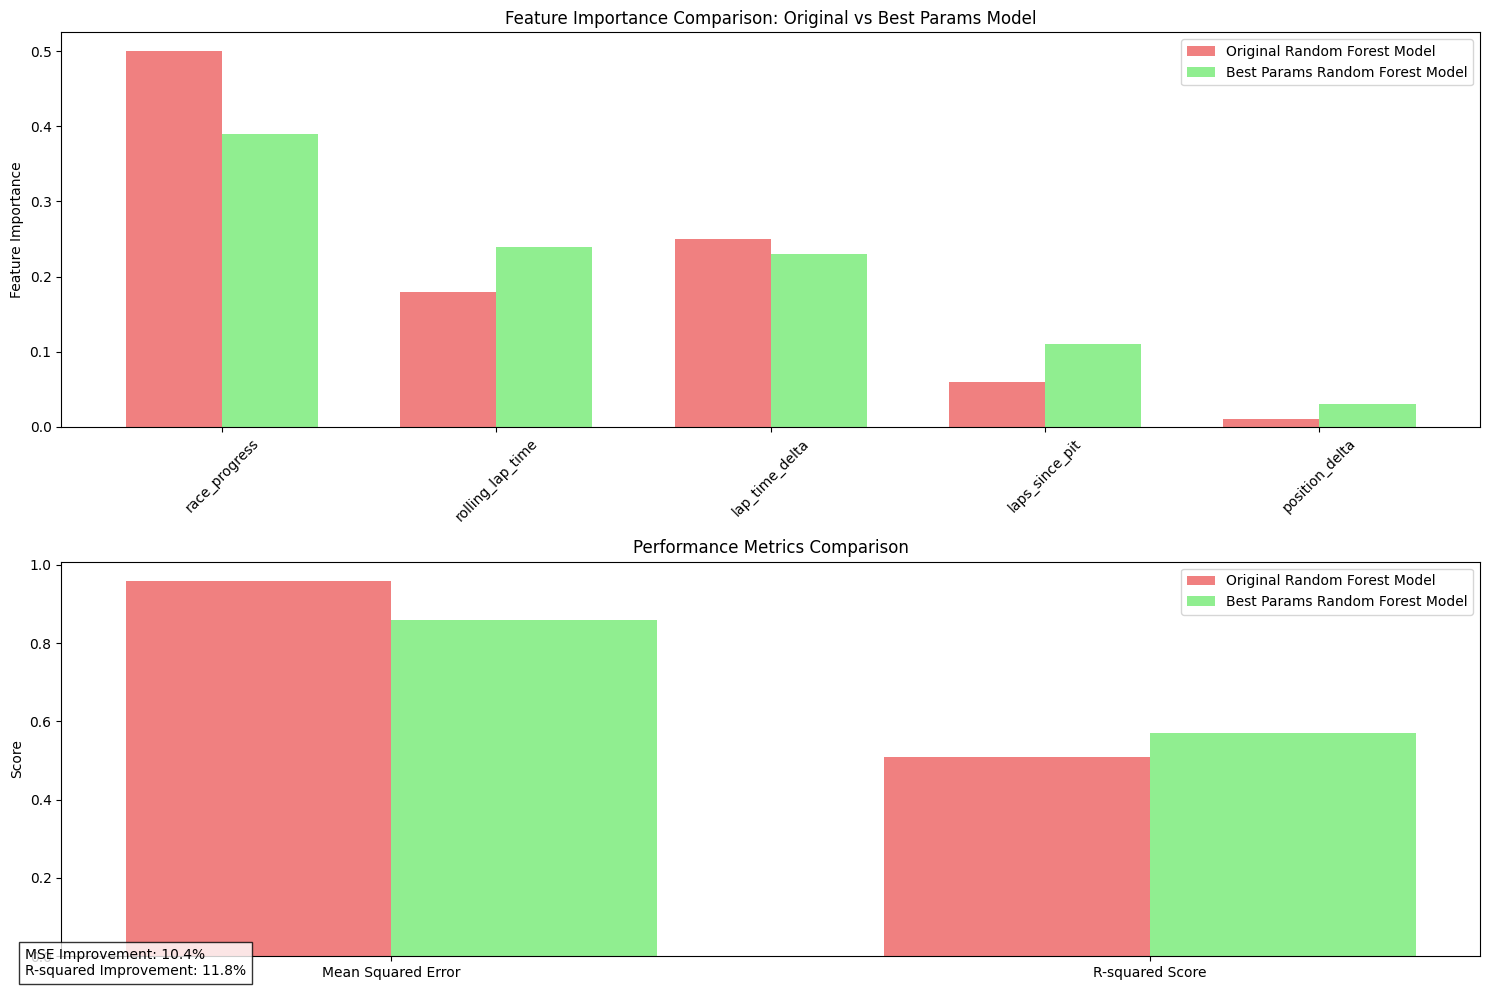

In [ ]:
def create_model_comparison_charts():

  """
    Creates visualization charts comparing original and optimized Random Forest models.

    Input:
      None (uses hardcoded values for model comparisons)

    Output:
      Displays two plots:
      - Bar chart comparing feature importance between models
      - Bar chart comparing MSE and R-squared performance metrics
      Also shows percentage improvements as text annotation

  """
  # Setting up the data
  features = ['race_progress', 'rolling_lap_time', 'lap_time_delta', 'laps_since_pit', 'position_delta']

  original_values = [0.50, 0.18, 0.25, 0.06, 0.01]  # Original model importances
  optimized_values = [0.39, 0.24, 0.23, 0.11, 0.03]  # Best Param model importances

  # Create figure with multiple subplots
  fig = plt.figure(figsize=(15, 10))

  # 1. Feature Importance Comparison Bar Chart
  plt.subplot(2, 1, 1)
  x = np.arange(len(features))
  width = 0.35

  plt.bar(x - width/2, original_values, width, label='Original Random Forest Model', color='lightcoral')
  plt.bar(x + width/2, optimized_values, width, label='Best Params Random Forest Model', color='lightgreen')

  plt.ylabel('Feature Importance')
  plt.title('Feature Importance Comparison: Original vs Best Params Model')
  plt.xticks(x, features, rotation=45)
  plt.legend()

  # 2. Performance Metrics Comparison
  plt.subplot(2, 1, 2)
  metrics = ['Mean Squared Error', 'R-squared Score']
  original_metrics = [0.96, 0.51]
  optimized_metrics = [0.86, 0.57]

  x = np.arange(len(metrics))

  plt.bar(x - width/2, original_metrics, width, label='Original Random Forest Model', color='lightcoral')
  plt.bar(x + width/2, optimized_metrics, width, label='Best Params Random Forest Model', color='lightgreen')

  plt.ylabel('Score')
  plt.title('Performance Metrics Comparison')
  plt.xticks(x, metrics)
  plt.legend()

  # Adjust layout and display
  plt.tight_layout()

  # Add text annotations showing improvement percentages
  mse_improvement = ((0.96 - 0.86) / 0.96) * 100
  r2_improvement = ((0.57 - 0.51) / 0.51) * 100

  plt.figtext(0.02, 0.02, f'MSE Improvement: {mse_improvement:.1f}%\nR-squared Improvement: {r2_improvement:.1f}%',
              fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

  plt.show()

# Generate the charts
create_model_comparison_charts()

## Section 5: Conclusion

To summarise this project, my goal was to look at Formula 1 data and be able to predict future lap times in order to get the best possible race strategy as the race is going. We look at the historical data from 1950 to 2024 and by circuits, to determine how previous races have gone and to predict how the current race will go.

I used two models to predict the lap times, Random Forest and Gradient Boost where the prior performed much better. While the current implementation shows promise with MSE and R-squared improvements of 10.4% and 11.8% respectively, several aspects could be enhanced to push these metrics further.

From the model architecture perspective, I could experiment with ensemble methods beyond just comparing Random Forest and Gradient Boost independently. Creating a stacked model combining predictions from both models might capture different aspects of race performance that each model picks up individually. This could potentially improve our predictions more than our current single-model approach, though it would require more computational resources.

The hyperparameter tuning, while effective, was limited by hardware constraints. Implementing a more comprehensive grid search or using Bayesian optimization could uncover better parameter combinations. This is particularly relevant for the Gradient Boost model where parameters like learning rate and tree depth heavily influence performance. However, this would significantly increase training time compared to our current focused parameter search.

Regarding the training data, one clear improvement would be implementing data augmentation techniques. For instance, we could generate synthetic lap time variations based on historical weather patterns or track evolution during races. While this would help the model better handle edge cases, we'd need to be careful not to introduce artificial patterns that don't reflect real F1 race conditions.

I'd also want to implement regularization techniques to address potential overfitting, particularly in the Gradient Boost model. L1 or L2 regularization could help the model generalize better to new circuits or unusual race conditions, though this might slightly reduce our performance on well-represented tracks in the training data.

Looking at bias mitigation, we could improve the model by introducing more balanced data across different eras of F1, as current training data might be skewed toward recent races. This would help the model better understand how race strategies have evolved, though obtaining detailed historical data remains challenging due to the limitations I mentioned with Formula 1 teams' data access.

These improvements could push our metrics higher than the current 10.4% MSE improvement, but they would need to be carefully balanced against computational constraints and data availability in the F1 domain.

One thing I loved about doing the data analysis was the real world consequences on data. It is quite rare to find a dataset that can really tell a story. This dataset is also very special to me as I am a fan of Formula 1 and have been since I watched Jenson Button win in 2009 with Brawn GP. It's also special to see the race highlights on Youtube to know how that race actually went, who crashed and when and relating that back to the data.

I think the hardest but most interesting part will be adding more context and playing with our features to bring that variability of the model higher, but I can imagine it being difficult to obtain more data. Majority of actual data of the cars will be held with the Formula 1 teams themselves.